### Generate a Type-Safe API with Autogen

In [1]:
import dotenv

from autogen_core.models import UserMessage
from autogen_ext.models.openai import AzureOpenAIChatCompletionClient
from azure.identity import DefaultAzureCredential, get_bearer_token_provider

dotenv.load_dotenv()

token_provider = get_bearer_token_provider(DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default")

client = AzureOpenAIChatCompletionClient(
    azure_deployment="gpt-4o-mini",
    model="gpt-4o-mini",
    api_version=dotenv.get_key(dotenv.find_dotenv(), "AZURE_AUTH_API_VERSION"),
    azure_endpoint=dotenv.get_key(dotenv.find_dotenv(), "AZURE_AUTH_API_BASE"),
    api_key=dotenv.get_key(dotenv.find_dotenv(), "AZURE_AUTH_API_KEY")
)

In [2]:
from pydantic import BaseModel

class ColorsAndAnimals(BaseModel):
    class Color(BaseModel):
        name: str
        rgb: list[int]

    class Animal(BaseModel):
        name: str
        reason: str

    colors: list[Color]
    animals: list[Animal]

In [3]:
import matplotlib.pyplot as plt

messages = [
    UserMessage(content="List me your favorite colors and animals, choose interesting colors.", source="user"),
]

response = await client.create(messages=messages, extra_create_args={"response_format": ColorsAndAnimals})

Color 1: Cerulean Blue ([0, 123, 167])


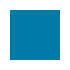

Color 2: Chartreuse ([127, 255, 0])


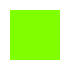

Color 3: Mauve ([224, 176, 255])


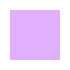

Color 4: Coral ([255, 127, 80])


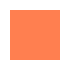

Color 5: Gamboge ([228, 155, 15])


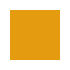

Animal 1: Axolotl (They are unique aquatic creatures known for their regenerative abilities.)
Animal 2: Quokka (Often referred to as the 'world's happiest animal' due to their friendly expression.)
Animal 3: Narwhal (Known as the 'unicorn of the sea' because of the long, spiral tusk.)
Animal 4: Pangolin (They are the only mammals with scales, and they are fascinating and elusive.)
Animal 5: Okapi (They have a striking appearance that resembles a mix between a giraffe and a zebra.)


In [4]:
response_content = ColorsAndAnimals.model_validate_json(response.content)

for i, color in enumerate(response_content.colors):
    print(f'Color {i+1}: {color.name} ({color.rgb})')
    plt.imshow([[color.rgb]])
    plt.axis('off')
    plt.gca().set_position([0, 0, 1, 1])
    plt.gcf().set_size_inches(0.5, 0.5)
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()

for i, animal in enumerate(response_content.animals):
    print(f'Animal {i+1}: {animal.name} ({animal.reason})')